# Simple Linear Regression

## The goal is to create a model that predicts delivery time using sorting time.

- The given sample dataset is a Delivery time dataset which inherits data for customers considering the sorting time the delivery time is assigned.
- So we have to build a model that predicts the delivery time according to the sorting time.

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading data
delivery_df=pd.read_csv('delivery_time.csv')
delivery_df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA

In [4]:
#First we will check if the dataset contains any null values or missing values
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


- There are no null values in the dataset

In [5]:
# Check for dupicates
delivery_df[delivery_df.duplicated()].shape

(0, 2)

- There are no duplicate values in the data set

In [6]:
# Analyse the measures of central tendenciy
delivery_df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
delivery_df.rename({"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"},axis=1,inplace=True)
delivery_df.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
#Now we will check the correlation matrix using .corr() function
delivery_df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


### Visualizations

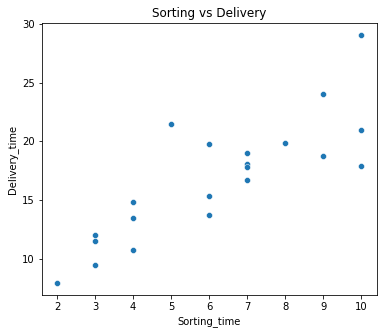

In [9]:
#Now we will plot a scatter plot to check the data in data set has any correlation between features and target. Since Bivariate
plt.figure(figsize=(6,5))
sns.scatterplot(data=delivery_df,x='Sorting_time',y='Delivery_time')
plt.title('Sorting vs Delivery');

<font color = 'green'> There is a positive correlation between the two variables </font>

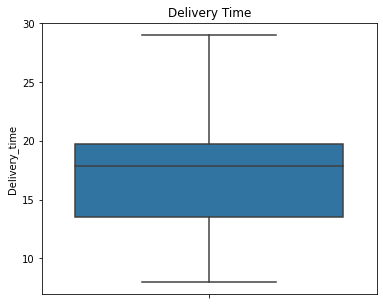

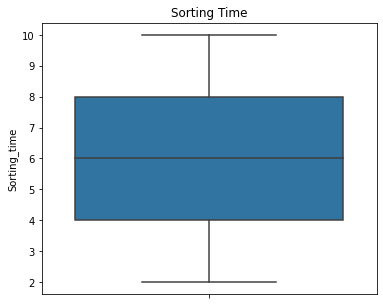

In [10]:
#Now we will check if the data contains any outliesrs usig boxplot
plt.figure(figsize=(6,5))
sns.boxplot(data=delivery_df,y='Delivery_time')
plt.title('Delivery Time');
plt.figure(figsize=(6,5))
sns.boxplot(data=delivery_df,y='Sorting_time')
plt.title('Sorting Time');

Text(0.5, 1.0, 'Histogram for Delivery Time')

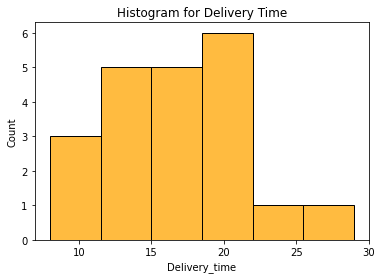

In [11]:
sns.histplot(delivery_df['Delivery_time'],color='orange')
plt.title('Histogram for Delivery Time')

Text(0.5, 1.0, 'Histogram for Delivery Time')

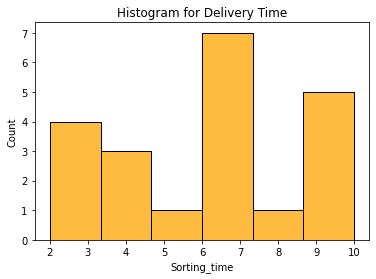

In [12]:
sns.histplot(delivery_df['Sorting_time'],color='orange')
plt.title('Histogram for Delivery Time')

Text(0.5, 1.0, 'Distribution for Delivery Time')

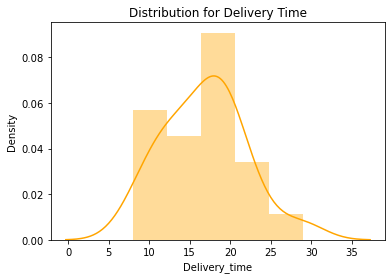

In [13]:
#Now we will check if the data is normally distributed using d distribution plot( this is used for univariate analysis)
sns.distplot(delivery_df['Delivery_time'],color='orange')
plt.title('Distribution for Delivery Time')

Text(0.5, 1.0, 'Distribution for Sorting Time')

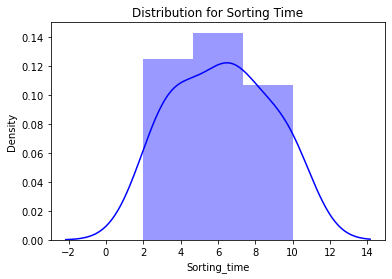

In [14]:
sns.distplot(delivery_df['Sorting_time'], color='blue')
plt.title('Distribution for Sorting Time')

<font color = 'green'> The dataset has normal distribution </font>

Text(0.5, 1.0, 'Regression Plot')

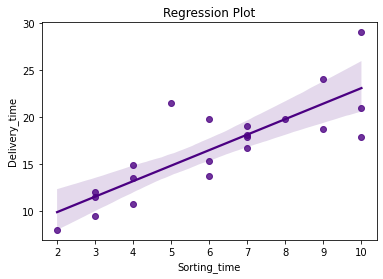

In [15]:
#Since the data has quiet anormal distribution we will move on towards the regression plot
sns.regplot(x = delivery_df["Sorting_time"], y = delivery_df["Delivery_time"], color = 'indigo')
plt.title('Regression Plot')

- We can see there is a best fit line drawn showing positive relationship

## Model Building

In [16]:
#Creating Model using OLS (Ordinary Least Squared)
model = smf.ols("Delivery_time ~ Sorting_time", data = delivery_df).fit()

In [17]:
# Finding Coefficients of the Parameter 
model.params 

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [18]:
#t and p values
model.tvalues,model.pvalues

(Intercept       3.823349
 Sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_time    0.000004
 dtype: float64)

In [19]:
# For finding R-squared value
(model.rsquared,model.rsquared_adj)  

(0.6822714748417231, 0.6655489208860244)

In [20]:
#splitting the datset
X=np.array(delivery_df['Sorting_time']).reshape(-1,1)
Y=np.array(delivery_df['Delivery_time']).reshape(-1,1)
Model = LinearRegression()
Model.fit(X,Y)

LinearRegression()

In [21]:
#Now we will store the pridicted data values of X column in predicted variable
predicted=Model.predict(X)

In [22]:
# Display Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        18:03:33   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The intercept value is 6.5827 
- The slope is 1.6490 
- The R-squared value is 0.682 
- The adusted R-squared values is 0.666

In [23]:
#calculating Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE=metrics.mean_absolute_error(Y,predicted)
print("Mean absolute error is {}".format(MAE))

Mean absolute error is 2.0857409551882657


## Model Prediction

In [61]:
new_data=pd.Series([6,10,8])
dpred=pd.DataFrame(new_data,columns=['Sorting_time'])
dpred

,Sorting_time
0,6
1,10
2,8


In [62]:
model.predict(dpred)

0    16.476853
1    23.072933
2    19.774893
dtype: float64

- <font color = 'indigo'><b>Inference :</b></font><font color = 'blue'>The model is efficint with 68% accuray and has a mean absolute error of 2.</font>

## Transformations

In [24]:
from sklearn.metrics import r2_score
Rsquare= r2_score(Y,predicted)
print("The Rsquare value is {}".format(Rsquare))

print("The intercept value is {}".format(Model.intercept_))

print("The slope value is{}".format(Model.coef_))

The Rsquare value is 0.6822714748417231
The intercept value is [6.58273397]
The slope value is[[1.6490199]]


### Log Transformation

In [25]:
x_log=np.log(X)
y_log=np.log(Y)

In [26]:
model1=LinearRegression()

In [27]:
model1.fit(x_log,y_log)

LinearRegression()

In [28]:
log_pred=model1.predict(x_log)

In [29]:
log_r2score=r2_score(y_log,log_pred)
print("The rsquare value after transforminh the variables into log is {}".format(log_r2score))

The rsquare value after transforminh the variables into log is 0.77216134926874


In [30]:
x_log=np.log(X)
y_log=np.log(Y)

model1=LinearRegression()

model1.fit(x_log,y_log)

log_pred=model1.predict(x_log)

log_r2score=r2_score(y_log,log_pred)
print("The rsquare value after transforminh the variables into log is {}".format(log_r2score))

The rsquare value after transforminh the variables into log is 0.77216134926874


### Square Transformation

In [31]:
x_sq=X*X
y_sq=Y*Y

In [32]:
model2=LinearRegression()

In [33]:
model2.fit(x_sq,y_sq)

LinearRegression()

In [34]:
sq_pred=model2.predict(x_sq)

In [35]:
sq_r2core=r2_score(y_sq,sq_pred)
print("The rsquare value after transforminh the variables into squares is {}".format(sq_r2core))

The rsquare value after transforminh the variables into squares is 0.5881883446986836


### Using Square Root Transformation

In [36]:
x_sqrt=np.sqrt(X)
y_sqrt=np.sqrt(Y)

In [37]:
model3=LinearRegression()

In [38]:
model3.fit(x_sqrt,y_sqrt)

LinearRegression()

In [39]:
sqrt_pred=model3.predict(x_sqrt)

In [40]:
sqrt_r2core=r2_score(y_sqrt,sqrt_pred)
print("The rsquare value after transforminh the variables into squares is {}".format(sqrt_r2core))

The rsquare value after transforminh the variables into squares is 0.7292011987544664


In [41]:
pd.DataFrame({"models":['model','model(Log)','model(squre)','model(squareroot)'],"rsquare value":[Rsquare,log_r2score,sq_r2core,sqrt_r2core]})

,models,rsquare value
0,model,0.682271
1,model(Log),0.772161
2,model(squre),0.588188
3,model(squareroot),0.729201


- <font color = 'blue'> We can clearly see the rsquare value variation for each model.</font>
- <font color = 'blue'> So we can select the model which can give better accuracy rate.</font>